In [ ]:
"""
Hand Writing Recognition using Neural Network.
Train model using Back propagation.
1 hidden layer.
724 input. 1 output.
if wrong spike then apply error relative to the weight,
propagating the error to behind layers.
big weight was wrong then big correction else you can leave it.
gradual correction.
train with for iteration.
test model on test data.
accuracy.. 
"""

In [57]:
import numpy as np
import gzip
import matplotlib.pyplot as plt

class InputTrainingImage:
    IMAGE_SIZE = 28
    
    def __init__(self):
        self.training_images_file = gzip.open('samples/train-images-idx3-ubyte.gz','r')
        self.training_images_file.read(16)
    
    def __iter__(self):
        return self
    
    def __next__(self):
        buf = self.training_images_file.read(InputTrainingImage.IMAGE_SIZE * InputTrainingImage.IMAGE_SIZE)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)        
        return data

class InputTrainingImageLabel:
    def __init__(self, numbers, limit):
        self.f = gzip.open('samples/train-labels-idx1-ubyte.gz','r')
        self.f.read(8)
        self.count = 0
        self.numbers = numbers
        self.max = limit
        self.training_data = InputTrainingImage()

    def __iter__(self):
        return self
    
    def __next__(self):
        if self.count == self.max:
            raise StopIteration

        buf = self.f.read(1)
        label = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        label = label[0]
        
        image = next(self.training_data)
        
        if label in self.numbers:
            self.count += 1
            return image, label
        
        return self.__next__()

Label:  5
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.  

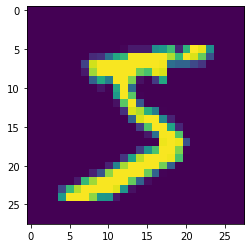

In [66]:
def display(data, label):
    print ("Label: ", label)
    image = np.asarray(data.reshape(28, 28)).squeeze()
    plt.imshow(image)
    plt.show()

display(*next(InputTrainingImageLabel([5], 1)))

In [59]:
def setup(i_n=728, h_n=1000, o_n=1):
    w_ih = np.random.uniform(0, 1, [i_n, h_n])
    w_ho = np.random.uniform(0, 1, h_n)
    return w_ih, w_ho

weights = setup(728, 1000, 1)
activation_function = lambda val: val > 0

In [ ]:
def feed_forword(model, inputs):
    output = 0
    return output

def train_once(weights, activation_function):
    for input_data, label in InputTrainingImageLabel([5], 1):
        # Data and Label

        """
        input_data -> weights -> hidden layer[1000] -> weights -> output[0]
        728 1000 times
        1000 one time
        feed forword
            h_i sum(i>0 * w_i) >0 spike
        output?
        """

        if feed_forword(input_data, model) == expected_output:
            # good
        else:
            model = back_propagate(error, model)

In [56]:
weights = train_once(weights, activation_function)

array([8.77123281e-01, 1.44621426e-01, 5.35516120e-01, 8.07082633e-01,
       8.46839830e-01, 5.88965217e-02, 3.91008806e-02, 6.64357006e-01,
       5.42586465e-01, 5.29744197e-02, 7.47552856e-01, 3.54735154e-01,
       2.50460252e-01, 6.31179295e-01, 1.60353732e-01, 9.39491471e-01,
       2.61512498e-01, 6.06299964e-01, 4.47790935e-01, 6.38507947e-01,
       8.21631909e-01, 1.13384854e-01, 4.97731335e-01, 5.52501313e-01,
       4.94522087e-02, 2.54975164e-01, 6.84727467e-01, 6.45249436e-01,
       3.24709748e-01, 4.16634871e-01, 3.29438201e-01, 1.89487020e-01,
       1.87959233e-01, 6.10044634e-01, 5.20666220e-01, 2.83821136e-01,
       9.03909335e-01, 5.19338663e-01, 5.51780301e-01, 3.07200419e-01,
       4.94726057e-01, 1.11039011e-01, 3.54523678e-01, 5.68043233e-01,
       1.70545380e-01, 3.57591727e-01, 5.32673554e-01, 2.36732285e-01,
       7.03431549e-01, 6.92031750e-01, 9.04286809e-01, 7.36167156e-01,
       2.22599418e-01, 2.89943819e-01, 2.68437383e-03, 2.69322754e-02,
      